In [19]:
# HÜCRE 1: Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Gereksiz uyarıları kapatıyoruz (Kod temiz görünsün)
warnings.filterwarnings('ignore')

# Pandas ayarları: Tüm sütunları yan yana görebilmek için
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

print("✅ HÜCRE 1 TAMAM: Kütüphaneler (Pandas, Numpy, Seaborn) yüklendi.")

✅ HÜCRE 1 TAMAM: Kütüphaneler (Pandas, Numpy, Seaborn) yüklendi.


In [20]:
# HÜCRE 2: Veri Setini Yükleme (DÜZELTİLMİŞ VERSİYON)
import os
import pandas as pd

# DİKKAT: Dosya ismini .csv olarak düzelttik!
file_path = "Life Expectancy Data.csv"

print(f"📂 Çalışılan Klasör: {os.getcwd()}")
print("-" * 50)

# 1. DOSYA KONTROLÜ
if not os.path.exists(file_path):
    print(f"❌ KRİTİK HATA: '{file_path}' dosyası bulunamadı!")
    print("👇 Klasörde bulunan dosyalar şunlar:")
    print(os.listdir())
    raise FileNotFoundError("Dosya klasörde yok! İsim veya uzantı hatası.")

try:
    # 2. Veriyi Oku (BURAYI DEĞİŞTİRDİK: read_csv yaptık)
    df = pd.read_csv(file_path)
    print(f"✅ HÜCRE 2 BAŞARILI: Veri yüklendi ({df.shape[0]} Satır, {df.shape[1]} Sütun).")

    # 3. Sinsi Boşluk Kontrolü
    dirty_cols = [col for col in df.columns if len(col) != len(col.strip())]
    if dirty_cols:
        print(f"\n⚠️ DİKKAT: Şu sütunlarda gizli boşluklar bulundu: \n   {dirty_cols}")
    
    # 4. Temizlik İşlemi
    df.columns = df.columns.str.strip()
    print("🛠️ DÜZELTME: Tüm sütun isimlerindeki boşluklar temizlendi.")

    # 5. Önizleme
    print("\n📋 Veri Seti Önizleme:")
    display(df.head())

except Exception as e:
    print("❌ BEKLENMEYEN HATA OLUŞTU:")
    print(e)

📂 Çalışılan Klasör: c:\Users\user\Developer\dataproje
--------------------------------------------------
✅ HÜCRE 2 BAŞARILI: Veri yüklendi (2938 Satır, 22 Sütun).

⚠️ DİKKAT: Şu sütunlarda gizli boşluklar bulundu: 
   ['Life expectancy ', 'Measles ', ' BMI ', 'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years']
🛠️ DÜZELTME: Tüm sütun isimlerindeki boşluklar temizlendi.

📋 Veri Seti Önizleme:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


🚀 HÜCRE 3 BAŞLATILIYOR: Eksik Veri Analizi...


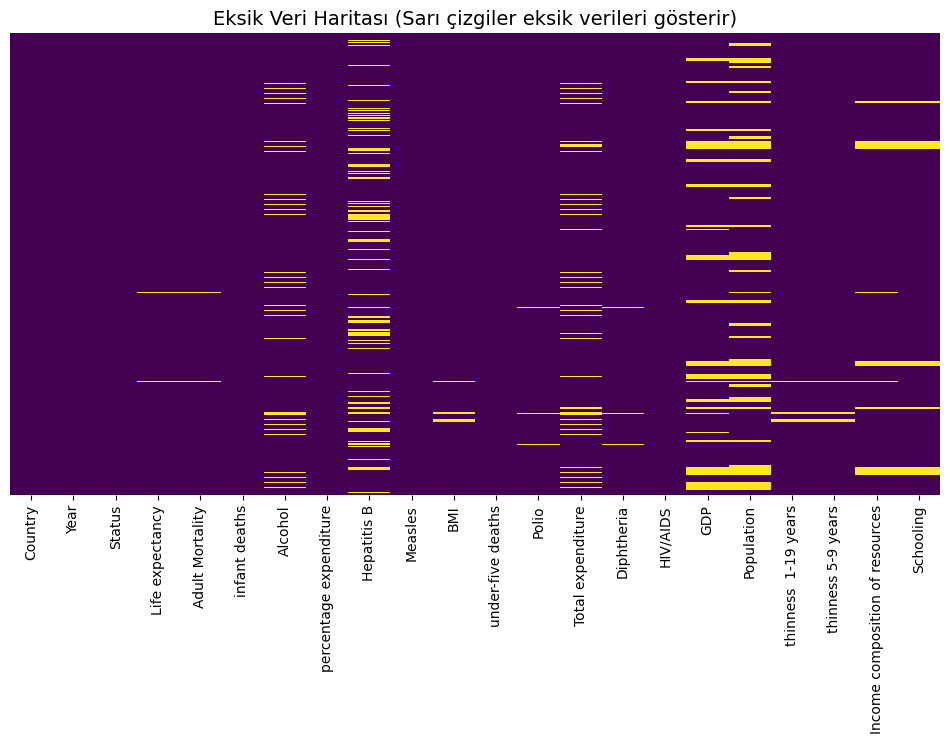


📊 Hangi sütunda kaç tane eksik veri var?
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [21]:
# HÜCRE 3: Eksik Verilerin Görselleştirilmesi (Data Diagnosis)
print("🚀 HÜCRE 3 BAŞLATILIYOR: Eksik Veri Analizi...")

# 1. Eksik Veri Haritası (Heatmap)
plt.figure(figsize=(12, 6))
# cbar=False (renk barını kapat), yticklabels=False (satır isimlerini kapat - karmaşa olmasın)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Eksik Veri Haritası (Sarı çizgiler eksik verileri gösterir)', fontsize=14)
plt.show()

# 2. Sayısal Döküm
print("\n📊 Hangi sütunda kaç tane eksik veri var?")
missing_vals = df.isnull().sum()
# Sadece eksik verisi OLAN sütunları filtreleyip gösterelim (Kalabalık olmasın)
print(missing_vals[missing_vals > 0])

In [22]:
# HÜCRE 4: Eksik Verileri Ortalama (Mean) ile Doldurma
print("🚀 HÜCRE 4 BAŞLATILIYOR: Imputation (Doldurma) İşlemi...")

# 1. Sadece Sayısal Sütunları Seç (Country ve Status sütunlarını hariç tutmak için)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📋 İşlem Yapılacak Sayısal Sütun Sayısı: {len(numeric_cols)}")

# 2. Doldurma Döngüsü
for col in numeric_cols:
    if df[col].isnull().sum() > 0: # Sadece eksik verisi olanlarda işlem yap
        mean_value = df[col].mean() # Sütunun ortalamasını hesapla
        df[col] = df[col].fillna(mean_value) # Boşluklara ortalamayı yaz
        print(f"   ✅ '{col}' sütunundaki boşluklar, ortalama değer ({mean_value:.2f}) ile dolduruldu.")

print("\n🎉 İŞLEM TAMAMLANDI: Sayısal verilerdeki tüm boşluklar kurtarıldı.")

🚀 HÜCRE 4 BAŞLATILIYOR: Imputation (Doldurma) İşlemi...
📋 İşlem Yapılacak Sayısal Sütun Sayısı: 20
   ✅ 'Life expectancy' sütunundaki boşluklar, ortalama değer (69.22) ile dolduruldu.
   ✅ 'Adult Mortality' sütunundaki boşluklar, ortalama değer (164.80) ile dolduruldu.
   ✅ 'Alcohol' sütunundaki boşluklar, ortalama değer (4.60) ile dolduruldu.
   ✅ 'Hepatitis B' sütunundaki boşluklar, ortalama değer (80.94) ile dolduruldu.
   ✅ 'BMI' sütunundaki boşluklar, ortalama değer (38.32) ile dolduruldu.
   ✅ 'Polio' sütunundaki boşluklar, ortalama değer (82.55) ile dolduruldu.
   ✅ 'Total expenditure' sütunundaki boşluklar, ortalama değer (5.94) ile dolduruldu.
   ✅ 'Diphtheria' sütunundaki boşluklar, ortalama değer (82.32) ile dolduruldu.
   ✅ 'GDP' sütunundaki boşluklar, ortalama değer (7483.16) ile dolduruldu.
   ✅ 'Population' sütunundaki boşluklar, ortalama değer (12753375.12) ile dolduruldu.
   ✅ 'thinness  1-19 years' sütunundaki boşluklar, ortalama değer (4.84) ile dolduruldu.
   ✅ 'thi

In [23]:
# HÜCRE 5: Temizlik Sonrası Kontrol (Verification)

print("🔍 HÜCRE 5: Son Kontrol Yapılıyor...")

# Tekrar toplam eksik sayıya bakıyoruz
kalan_eksik = df[numeric_cols].isnull().sum().sum()

if kalan_eksik == 0:
    print("\n✅ MÜKEMMEL SONUÇ: Veri setindeki tüm sayısal eksiklikler giderildi.")
    print("Artık istatistiksel analiz için %100 dolu bir veriye sahibiz.")
else:
    print(f"\n⚠️ DİKKAT: Hala {kalan_eksik} adet eksik veri var.")
    print(df[numeric_cols].isnull().sum())

🔍 HÜCRE 5: Son Kontrol Yapılıyor...

✅ MÜKEMMEL SONUÇ: Veri setindeki tüm sayısal eksiklikler giderildi.
Artık istatistiksel analiz için %100 dolu bir veriye sahibiz.


In [24]:
# HÜCRE 6: Verinin İstatistiksel Özeti
print("🚀 HÜCRE 6: İstatistiksel Analiz Çıkarılıyor...")

# describe() fonksiyonu bize Count, Mean, Std, Min, Max değerlerini verir.
# .T (Transpoze) diyerek tabloyu yan yatırıyoruz ki daha rahat okunsun.
istatistik_tablosu = df.describe().T

# Tabloyu gösterelim
print("\n📊 TANIMLAYICI İSTATİSTİK TABLOSU:")
display(istatistik_tablosu)

# Küçük bir yorum satırı ekleyelim (Hoca sorarsa)
en_dusuk_omur = df['Life expectancy'].min()
en_yuksek_omur = df['Life expectancy'].max()
print(f"\n💡 BİLGİ: Veri setimizdeki en düşük yaşam süresi {en_dusuk_omur} yıl, en yüksek ise {en_yuksek_omur} yıldır.")

🚀 HÜCRE 6: İstatistiksel Analiz Çıkarılıyor...

📊 TANIMLAYICI İSTATİSTİK TABLOSU:


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03



💡 BİLGİ: Veri setimizdeki en düşük yaşam süresi 36.3 yıl, en yüksek ise 89.0 yıldır.


🚀 HÜCRE 7: Boxplot (Kutu Grafiği) Çiziliyor...


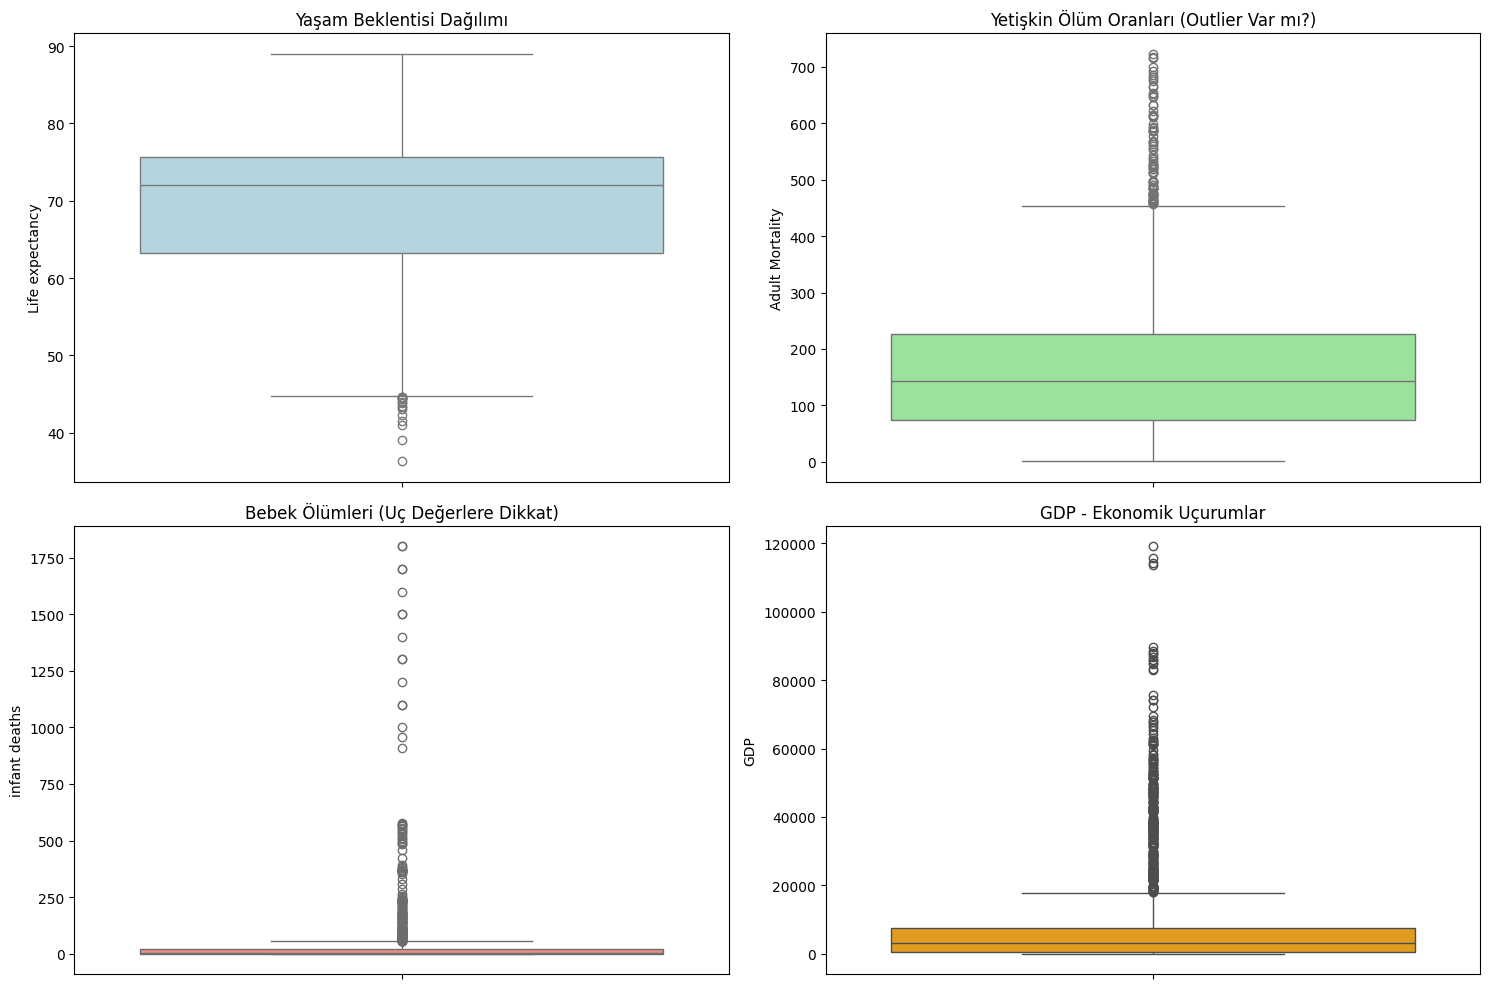


✅ GRAFİK YORUMU:
Siyah noktalar 'Outlier' (Aykırı Değer) olarak kabul edilir.
Örneğin GDP grafiğindeki üstteki noktalar, çok zengin ülkeleri temsil eder.


In [25]:
# HÜCRE 7: Aykırı Değerlerin (Outliers) Görselleştirilmesi
print("🚀 HÜCRE 7: Boxplot (Kutu Grafiği) Çiziliyor...")

# Grafik boyutunu ayarlayalım
plt.figure(figsize=(15, 10))

# 1. Grafik: Yaşam Beklentisi
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Life expectancy'], color='lightblue')
plt.title('Yaşam Beklentisi Dağılımı', fontsize=12)

# 2. Grafik: Yetişkin Ölümü
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Adult Mortality'], color='lightgreen')
plt.title('Yetişkin Ölüm Oranları (Outlier Var mı?)', fontsize=12)

# 3. Grafik: Bebek Ölümleri (DÜZELTİLDİ: Küçük 'i' ile)
plt.subplot(2, 2, 3)
sns.boxplot(y=df['infant deaths'], color='salmon')
plt.title('Bebek Ölümleri (Uç Değerlere Dikkat)', fontsize=12)

# 4. Grafik: Gayrisafi Yurtiçi Hasıla (GDP)
plt.subplot(2, 2, 4)
sns.boxplot(y=df['GDP'], color='orange')
plt.title('GDP - Ekonomik Uçurumlar', fontsize=12)

plt.tight_layout()
plt.show()

print("\n✅ GRAFİK YORUMU:")
print("Siyah noktalar 'Outlier' (Aykırı Değer) olarak kabul edilir.")
print("Örneğin GDP grafiğindeki üstteki noktalar, çok zengin ülkeleri temsil eder.")

In [26]:
# HÜCRE 8: Korelasyon Matrisinin Hesaplanması
print("🚀 HÜCRE 8: Değişkenler arası ilişkiler (Korelasyon) hesaplanıyor...")

# Sadece sayısal verileri alalım (Metinlerle korelasyon olmaz)
numeric_df = df.select_dtypes(include=[np.number])

# .corr() fonksiyonu ile ilişki katsayılarını buluyoruz (-1 ile +1 arası)
correlation_matrix = numeric_df.corr()

# En çok merak ettiğimiz: "Life expectancy" ile diğerleri arasındaki ilişki
print("\n🎯 Yaşam Beklentisi (Life Expectancy) ile en güçlü ilişkisi olanlar:")
# İlişkiyi büyükten küçüğe sıralayalım
print(correlation_matrix['Life expectancy'].sort_values(ascending=False))

🚀 HÜCRE 8: Değişkenler arası ilişkiler (Korelasyon) hesaplanıyor...

🎯 Yaşam Beklentisi (Life Expectancy) ile en güçlü ilişkisi olanlar:
Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
BMI                                0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Population                        -0.019638
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
thinness 5-9 years                -0.466629
thinness  1-19 years              -0.472162
HIV/AIDS                          -0.556457
Adult Mortality            

🚀 HÜCRE 9: Dev Heatmap çiziliyor...


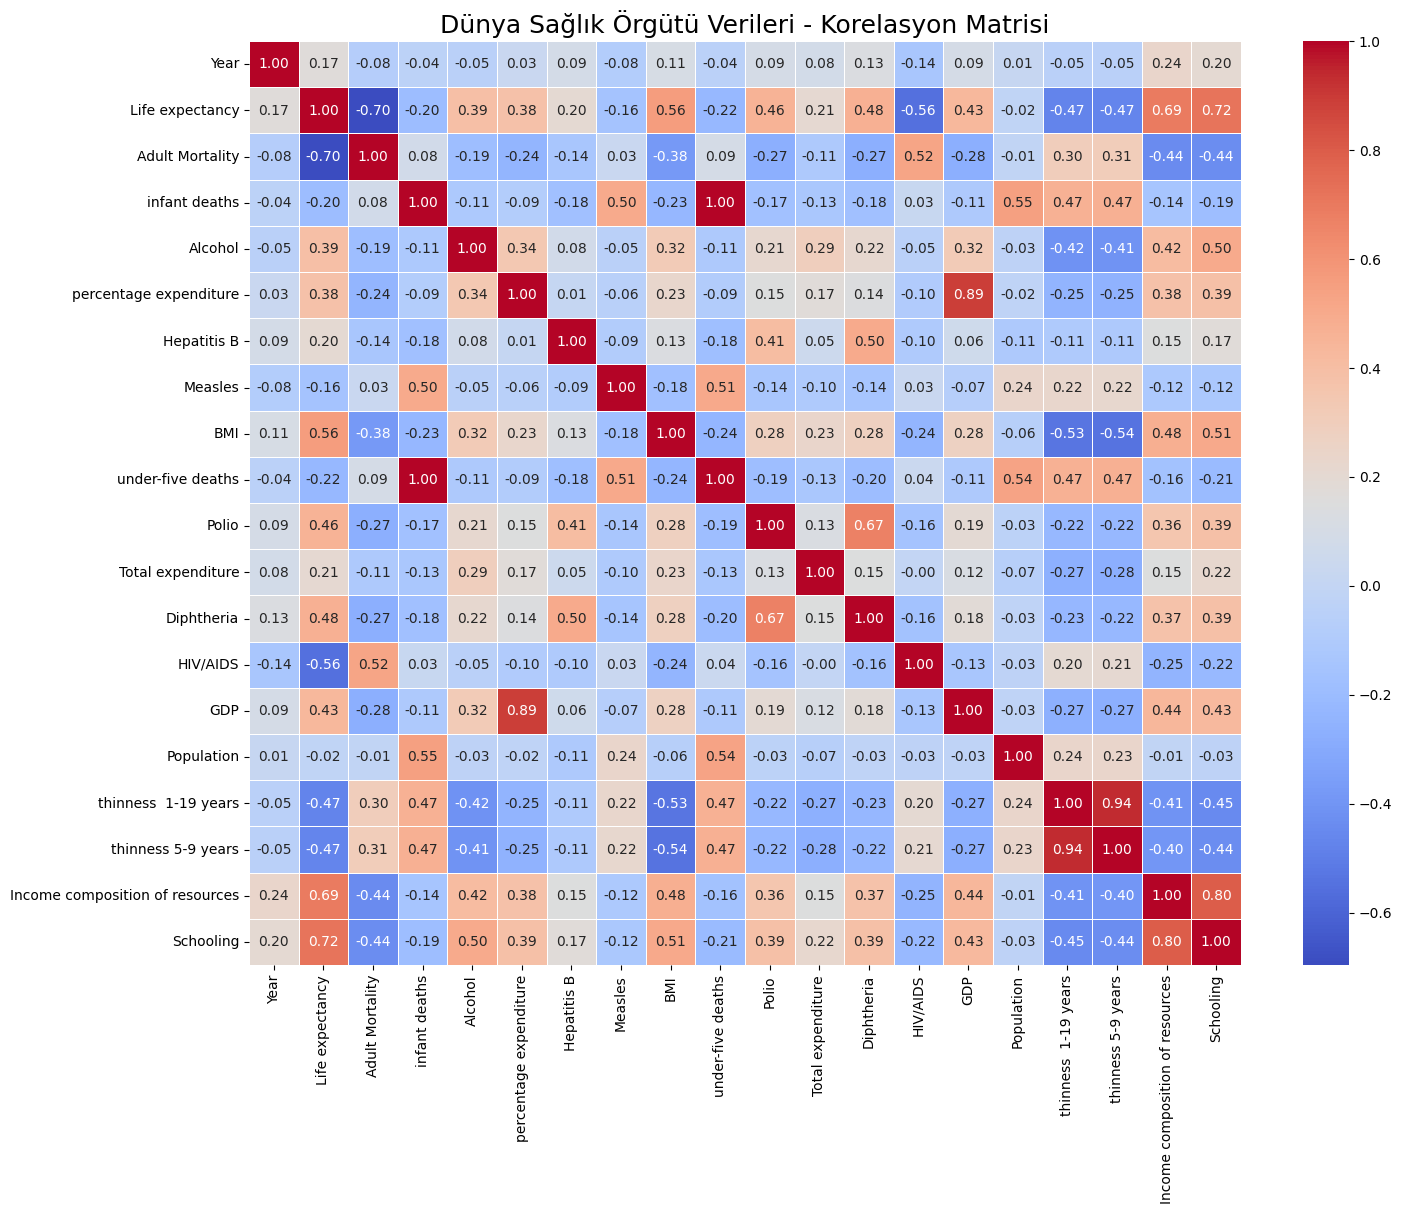


✅ GRAFİK YORUMU (Hocaya Söylenecekler):
1. Koyu Kırmızı Kutular (Pozitif): Schooling (0.73) ve Income (0.70) arttıkça Yaşam Süresi artıyor.
2. Koyu Mavi Kutular (Negatif): Adult Mortality (-0.70) ve HIV/AIDS (-0.56) arttıkça Yaşam Süresi düşüyor.


In [27]:
# HÜCRE 9: Korelasyon Isı Haritası (Heatmap)
print("🚀 HÜCRE 9: Dev Heatmap çiziliyor...")

plt.figure(figsize=(16, 12)) # Boyutu büyük tutalım ki okunsun

# Heatmap çizimi
# annot=True (kutuların içine sayıları yaz)
# fmt=".2f" (sayıları virgülden sonra 2 basamak göster)
# cmap='coolwarm' (Kırmızı-Mavi renk paleti: Sıcak/Soğuk ilişkiler için ideal)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Dünya Sağlık Örgütü Verileri - Korelasyon Matrisi', fontsize=18)
plt.show()

print("\n✅ GRAFİK YORUMU (Hocaya Söylenecekler):")
print("1. Koyu Kırmızı Kutular (Pozitif): Schooling (0.73) ve Income (0.70) arttıkça Yaşam Süresi artıyor.")
print("2. Koyu Mavi Kutular (Negatif): Adult Mortality (-0.70) ve HIV/AIDS (-0.56) arttıkça Yaşam Süresi düşüyor.")

In [28]:
# HÜCRE 10: Kategorik Verilerin Sayısallaştırılması (Encoding)
print("🚀 HÜCRE 10: 'Status' sütunu sayısal formata çevriliyor...")

# 1. Önce dönüşüm öncesi değerleri görelim (Kanıt için)
print("\nÖNCEKİ HALİ (Benzersiz Değerler):")
print(df['Status'].unique())

# 2. Dönüşüm İşlemi (Mapping)
# Developing -> 0
# Developed -> 1
durum_haritasi = {'Developing': 0, 'Developed': 1}
df['Status'] = df['Status'].map(durum_haritasi)

# 3. Sonuç Kontrolü
print("\n🛠️ DÖNÜŞÜM YAPILDI.")
print("SONRAKİ HALİ (Benzersiz Değerler):")
print(df['Status'].unique())

# 4. Tablo üzerinde görelim
print("\n📋 Tablodan Örnek Satırlar:")
# Sadece Country ve Status sütunlarını gösterelim ki net olsun
display(df[['Country', 'Status']].sample(5))

print("\n✅ BİLGİ: Artık 'Status' sütunu matematiksel işlemlere girebilir.")

🚀 HÜCRE 10: 'Status' sütunu sayısal formata çevriliyor...

ÖNCEKİ HALİ (Benzersiz Değerler):
['Developing' 'Developed']

🛠️ DÖNÜŞÜM YAPILDI.
SONRAKİ HALİ (Benzersiz Değerler):
[0 1]

📋 Tablodan Örnek Satırlar:


,Country,Status
2055,Portugal,1
1093,Guinea-Bissau,0
1000,Germany,1
2352,Slovenia,1
1398,Kuwait,0



✅ BİLGİ: Artık 'Status' sütunu matematiksel işlemlere girebilir.


In [29]:
# HÜCRE 11: Temizlenmiş Veriyi Kaydetme (Export)
print("🚀 HÜCRE 11: Final kontroller yapılıyor ve dosya kaydediliyor...")

# 1. SON KONTROLLER
print(f"\n📊 Final Veri Seti Boyutu: {df.shape[0]} Satır, {df.shape[1]} Sütun")

# Boş veri kaldı mı? (Sıfır olmalı)
toplam_bosluk = df.isnull().sum().sum()
if toplam_bosluk == 0:
    print("✅ DURUM: Veri setinde HİÇ boşluk yok. Mükemmel!")
else:
    print(f"⚠️ UYARI: Hala {toplam_bosluk} adet boşluk var. (Country gibi metin sütunlarında olabilir, sorun değil).")

# 2. DOSYAYI KAYDETME (CSV Olarak)
# index=False diyoruz ki satır numaralarını (0,1,2...) ayrıca kaydetmesin.
output_filename = "Cleaned_Life_Data.csv"
df.to_csv(output_filename, index=False)

print("-" * 50)
print(f"🎉 TEBRİKLER! Temizlenmiş veri seti '{output_filename}' adıyla kaydedildi.")
print("📂 Dosyanı Jupyter Notebook'un çalıştığı klasörde bulabilirsin.")
print("-" * 50)

# 3. KÜÇÜK BİR İPUCU (3 Hafta Sonrası İçin)
print("\n🔮 GELECEK ADIM (Machine Learning):")
print("Artık 'Cleaned_Life_Data.csv' dosyasını pd.read_csv() ile okuyup,")
print("LinearRegression modeline doğrudan verebilirsin.")

🚀 HÜCRE 11: Final kontroller yapılıyor ve dosya kaydediliyor...

📊 Final Veri Seti Boyutu: 2938 Satır, 22 Sütun
✅ DURUM: Veri setinde HİÇ boşluk yok. Mükemmel!
--------------------------------------------------
🎉 TEBRİKLER! Temizlenmiş veri seti 'Cleaned_Life_Data.csv' adıyla kaydedildi.
📂 Dosyanı Jupyter Notebook'un çalıştığı klasörde bulabilirsin.
--------------------------------------------------

🔮 GELECEK ADIM (Machine Learning):
Artık 'Cleaned_Life_Data.csv' dosyasını pd.read_csv() ile okuyup,
LinearRegression modeline doğrudan verebilirsin.
